# Bike Sharing Assignment
#### With this assignment, we are trying to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### We have been given a data set using which, we have to model the demand for shared bikes and how exactly the demands vary with different features.

### Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike_data = pd.read_csv("day.csv")

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### no columns have null values 

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#removing unnnecessary columns
df = bike_data.drop(['instant','dteday','casual','registered'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
df.shape

(730, 12)

In [11]:
#The target variable in our data is cnt. Hence, the predictor variables in this model will be season, yr, month, holiday, weekday, workingday, weathersit, temp, atemp, hum and windspeed

### Step 2: Visualising Data 

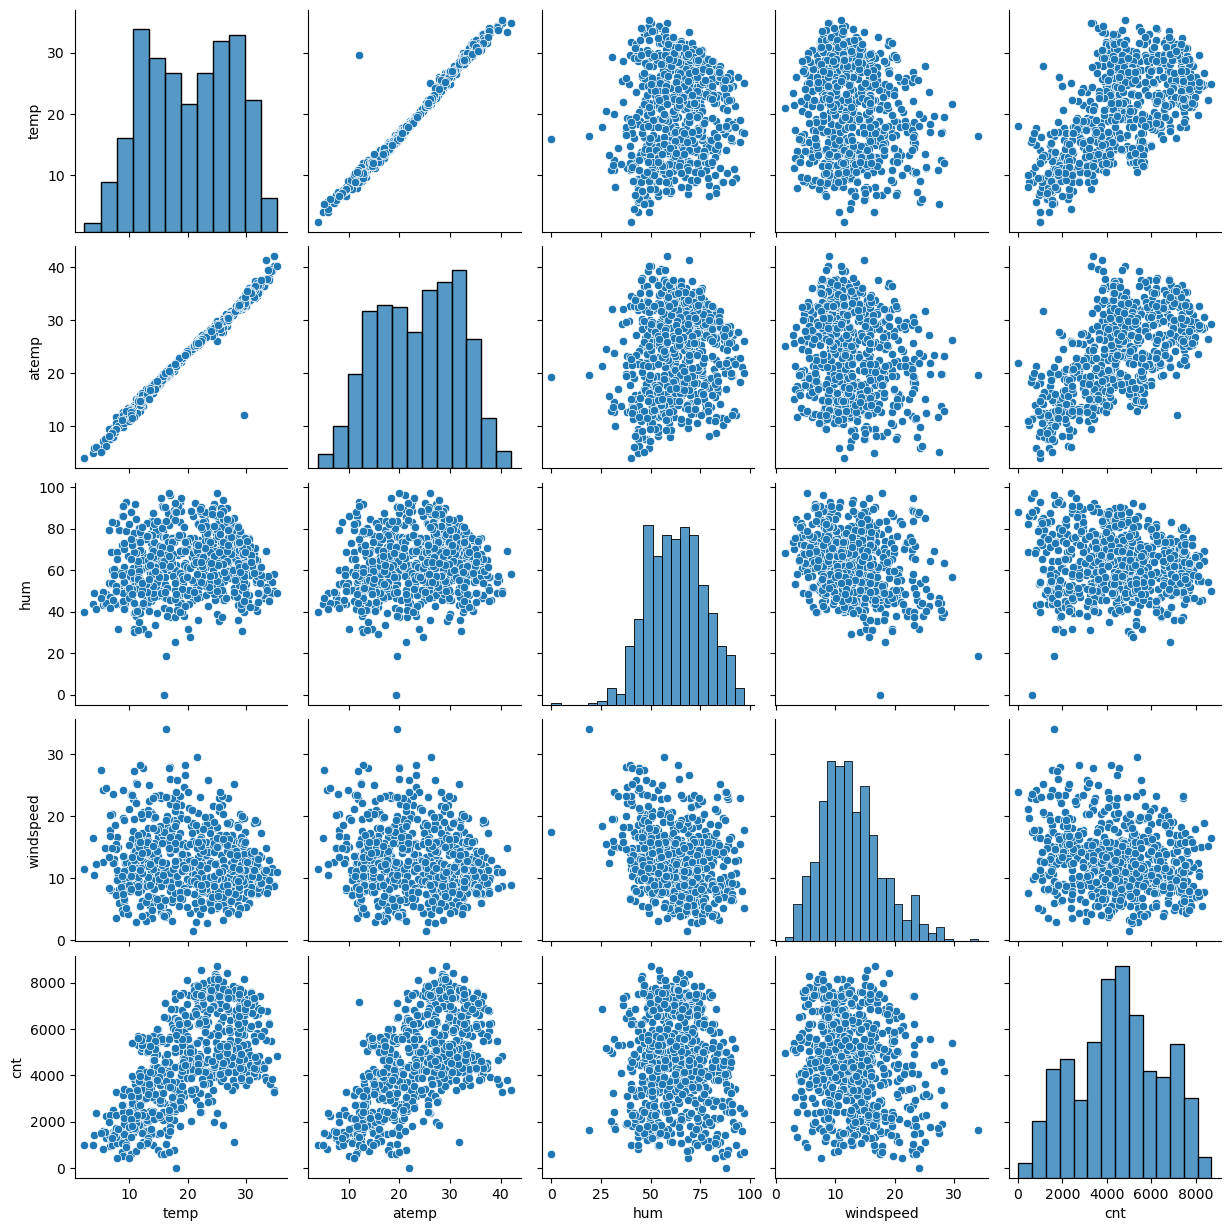

In [12]:
#Preparing a pairplot for numerical predictor varaibles and target variable
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

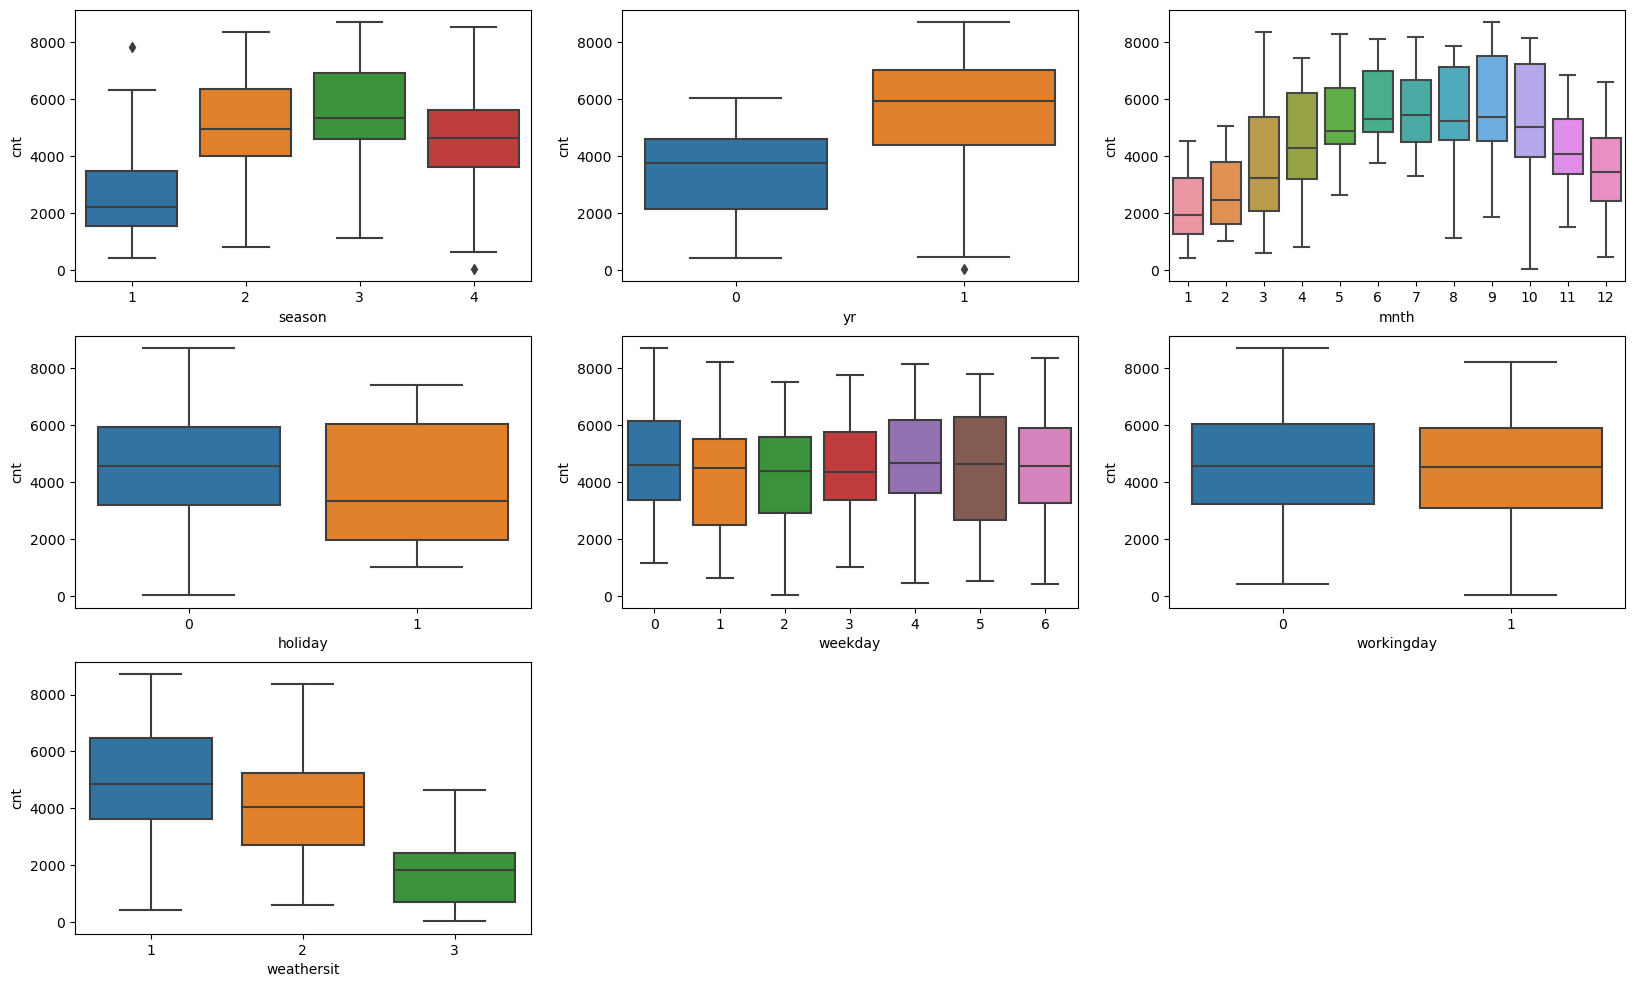

In [13]:
#Preparing a boxplots for non-numerical (categorical variables)
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Results
- Pairplots
  - Variables temp and atemp have a positive linear relationship with cnt (target varibale)
  - Plots for variables windspeed and hum do not show a clear pattern and we can hence infer that they do not have a relationship with cnt
 
- Boxplots
  - Season: Fall has the highest no. of riders and Spring has the lowest number of riders
  - Year: Number of variables increased going from 2018 to 2019
  - Month: Highest number of riders were observed in September and lowest were observed in January
  - Holiday: More riders are observed on a day which is not a holiday
  - Weathersit: Most number of riders were in the Clear/Few clouds category whereas the lowest were observed in the Light Snow/Rain category

In [14]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


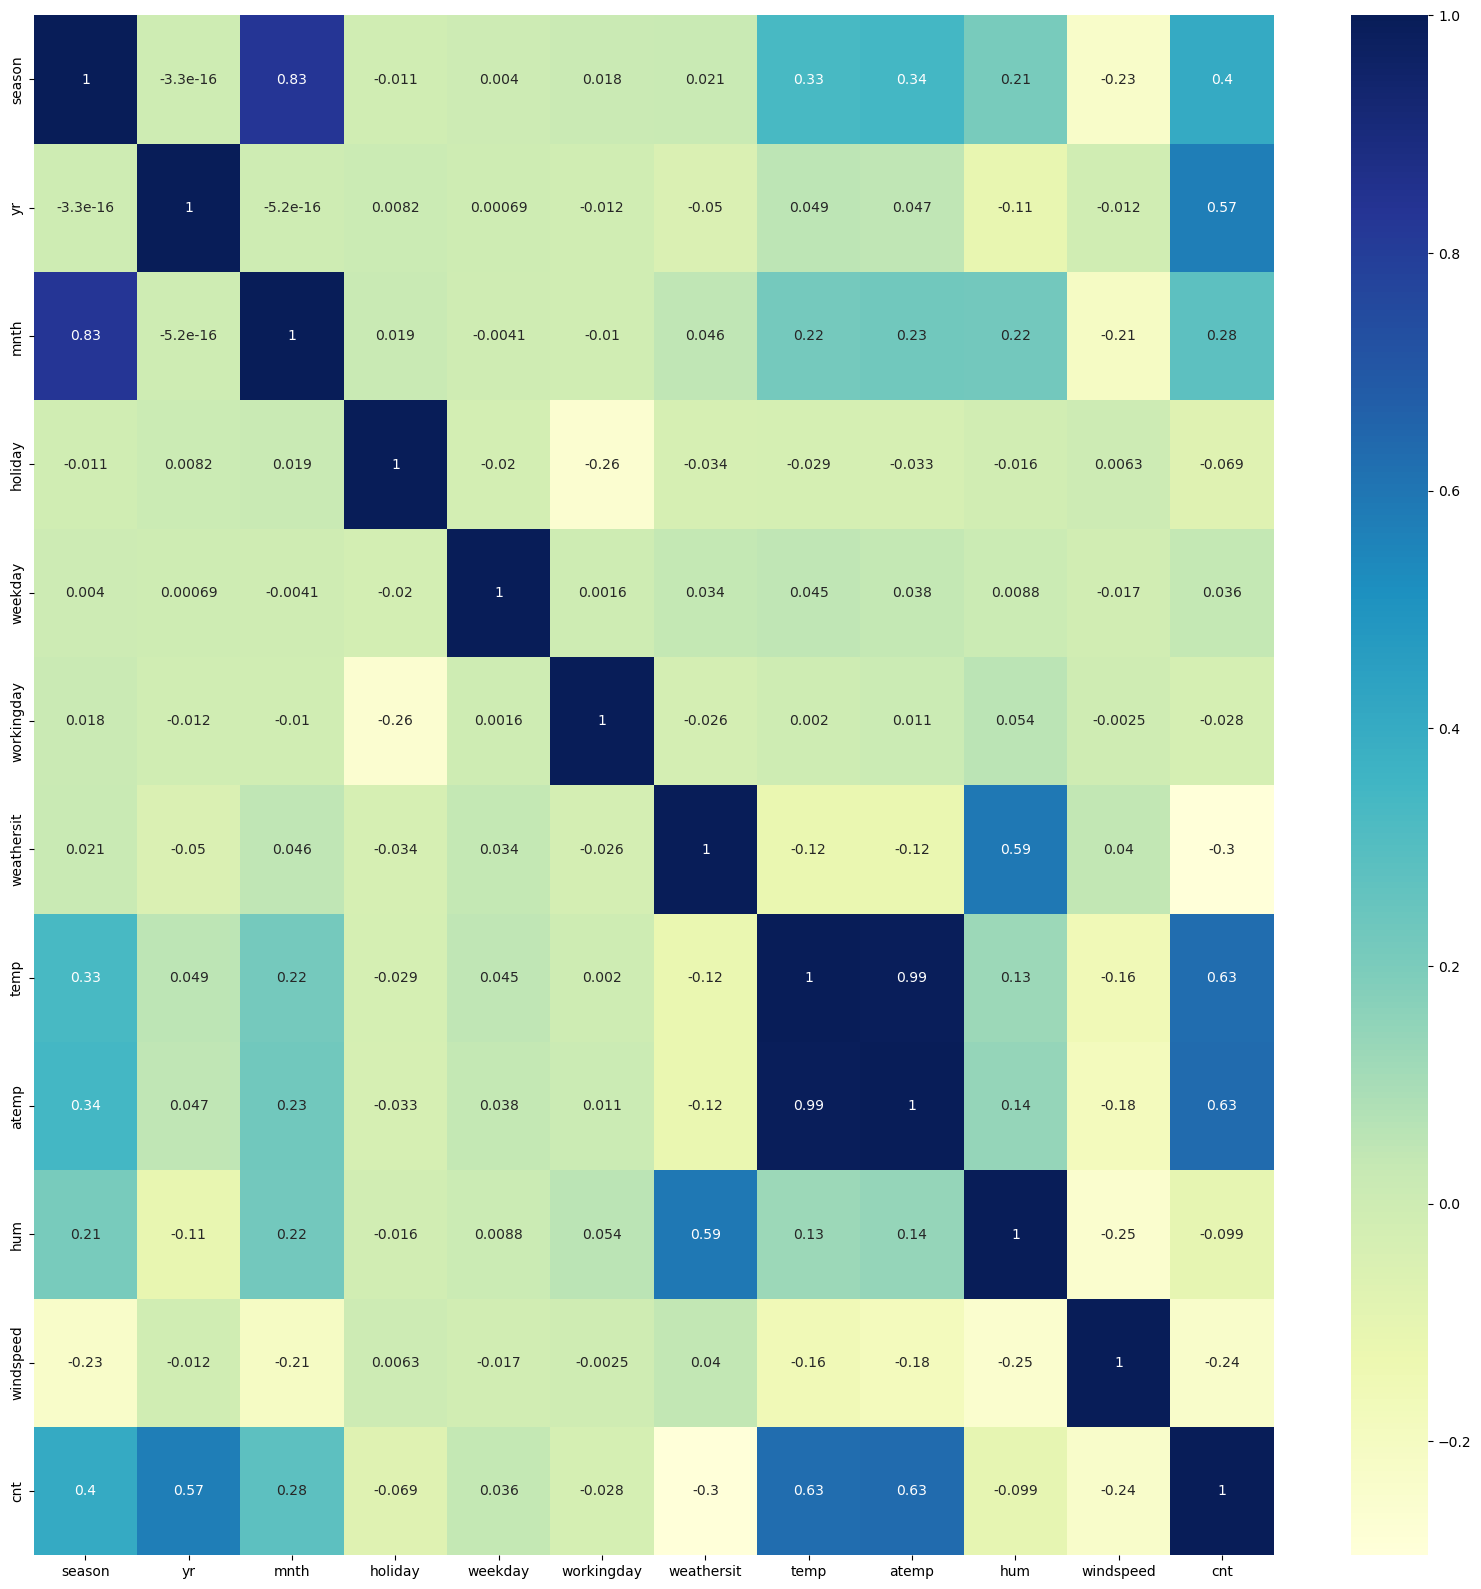

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='YlGnBu', annot = True)
plt.show()

### Step 3: Preparing Data for Modeling (train-test split, rescaling, etc.)

In [16]:
#Treating Categorical Variables: We will be converting the values of the variables season, mnth, weekday and weathersit into the categories they represent.

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['mnth'] = df['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

df['weekday'] = df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

df['weathersit'] = df['weathersit'].map({1:"Clear_Few_Clouds",2:"Mist_cloudy",3:"Light_rain_snow_Thunderstorm", 4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [17]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Making Dummy Variables

#Season
dum_season = pd.get_dummies(df['season'], drop_first = True)
dum_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
#Month
dum_mnth = pd.get_dummies(df['mnth'], drop_first = True)
dum_mnth.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
#Weekday
dum_weekday = pd.get_dummies(df['weekday'], drop_first = True)
dum_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [21]:
#Weathersit
dum_weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
dum_weathersit.head()

,Light_rain_snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [22]:
#Combining dummy data sets with df and dropping repitative categorical variable columns

df_final = pd.concat([df,dum_season,dum_mnth,dum_weekday,dum_weathersit],axis=1)

df_final = df_final.drop(['season','mnth','weekday','weathersit'],axis=1)

df_final.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_final.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting data into train-test sets

In [41]:
#Importing necessary libraries
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE as rfe
from sklearn.linear_model import LinearRegression

In [25]:
np.random.seed(0)
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


#### Rescaling

##### Now, we will be rescaling the variables so that the values have a comparable scale and the coefficients in the fitted model are not extremely large or extremely small. We can do this by the following ways:
1. MaxMin Scaling
2. Standardisation

In this model, we will be using the MinMax Scaling method

In [27]:
scaler = MinMaxScaler()

In [28]:
#scaling all variables with numerical values
num_vars = ['cnt', 'atemp', 'temp', 'hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [29]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
yr,1.000000,-0.014980,-0.003005,0.107288,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,...,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,...,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-2.815377e-02,-0.038279
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.003814,0.020701,-0.002504,-0.008723,-0.032886,0.030488,...,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,8.289412e-03,-0.068924
temp,0.107288,-0.066282,-0.007643,1.000000,0.989537,0.155415,-0.187396,0.643517,-0.605988,0.125582,...,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-3.609266e-02,-0.090161
atemp,0.104206,-0.070640,0.003814,0.989537,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,...,-0.005262,0.206157,-0.036829,0.012090,0.006359,0.078627,0.002815,-0.043377,-4.426553e-02,-0.086069
hum,-0.084792,-0.029093,0.020701,0.155415,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,...,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,...,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,-0.008723,0.643517,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,...,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-2.265984e-01,-0.175530
spring,-0.036320,0.053339,-0.032886,-0.605988,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,...,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,-4.455809e-02,0.013970
summer,0.013856,-0.063232,0.030488,0.125582,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,...,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,-4.523062e-02,0.039442


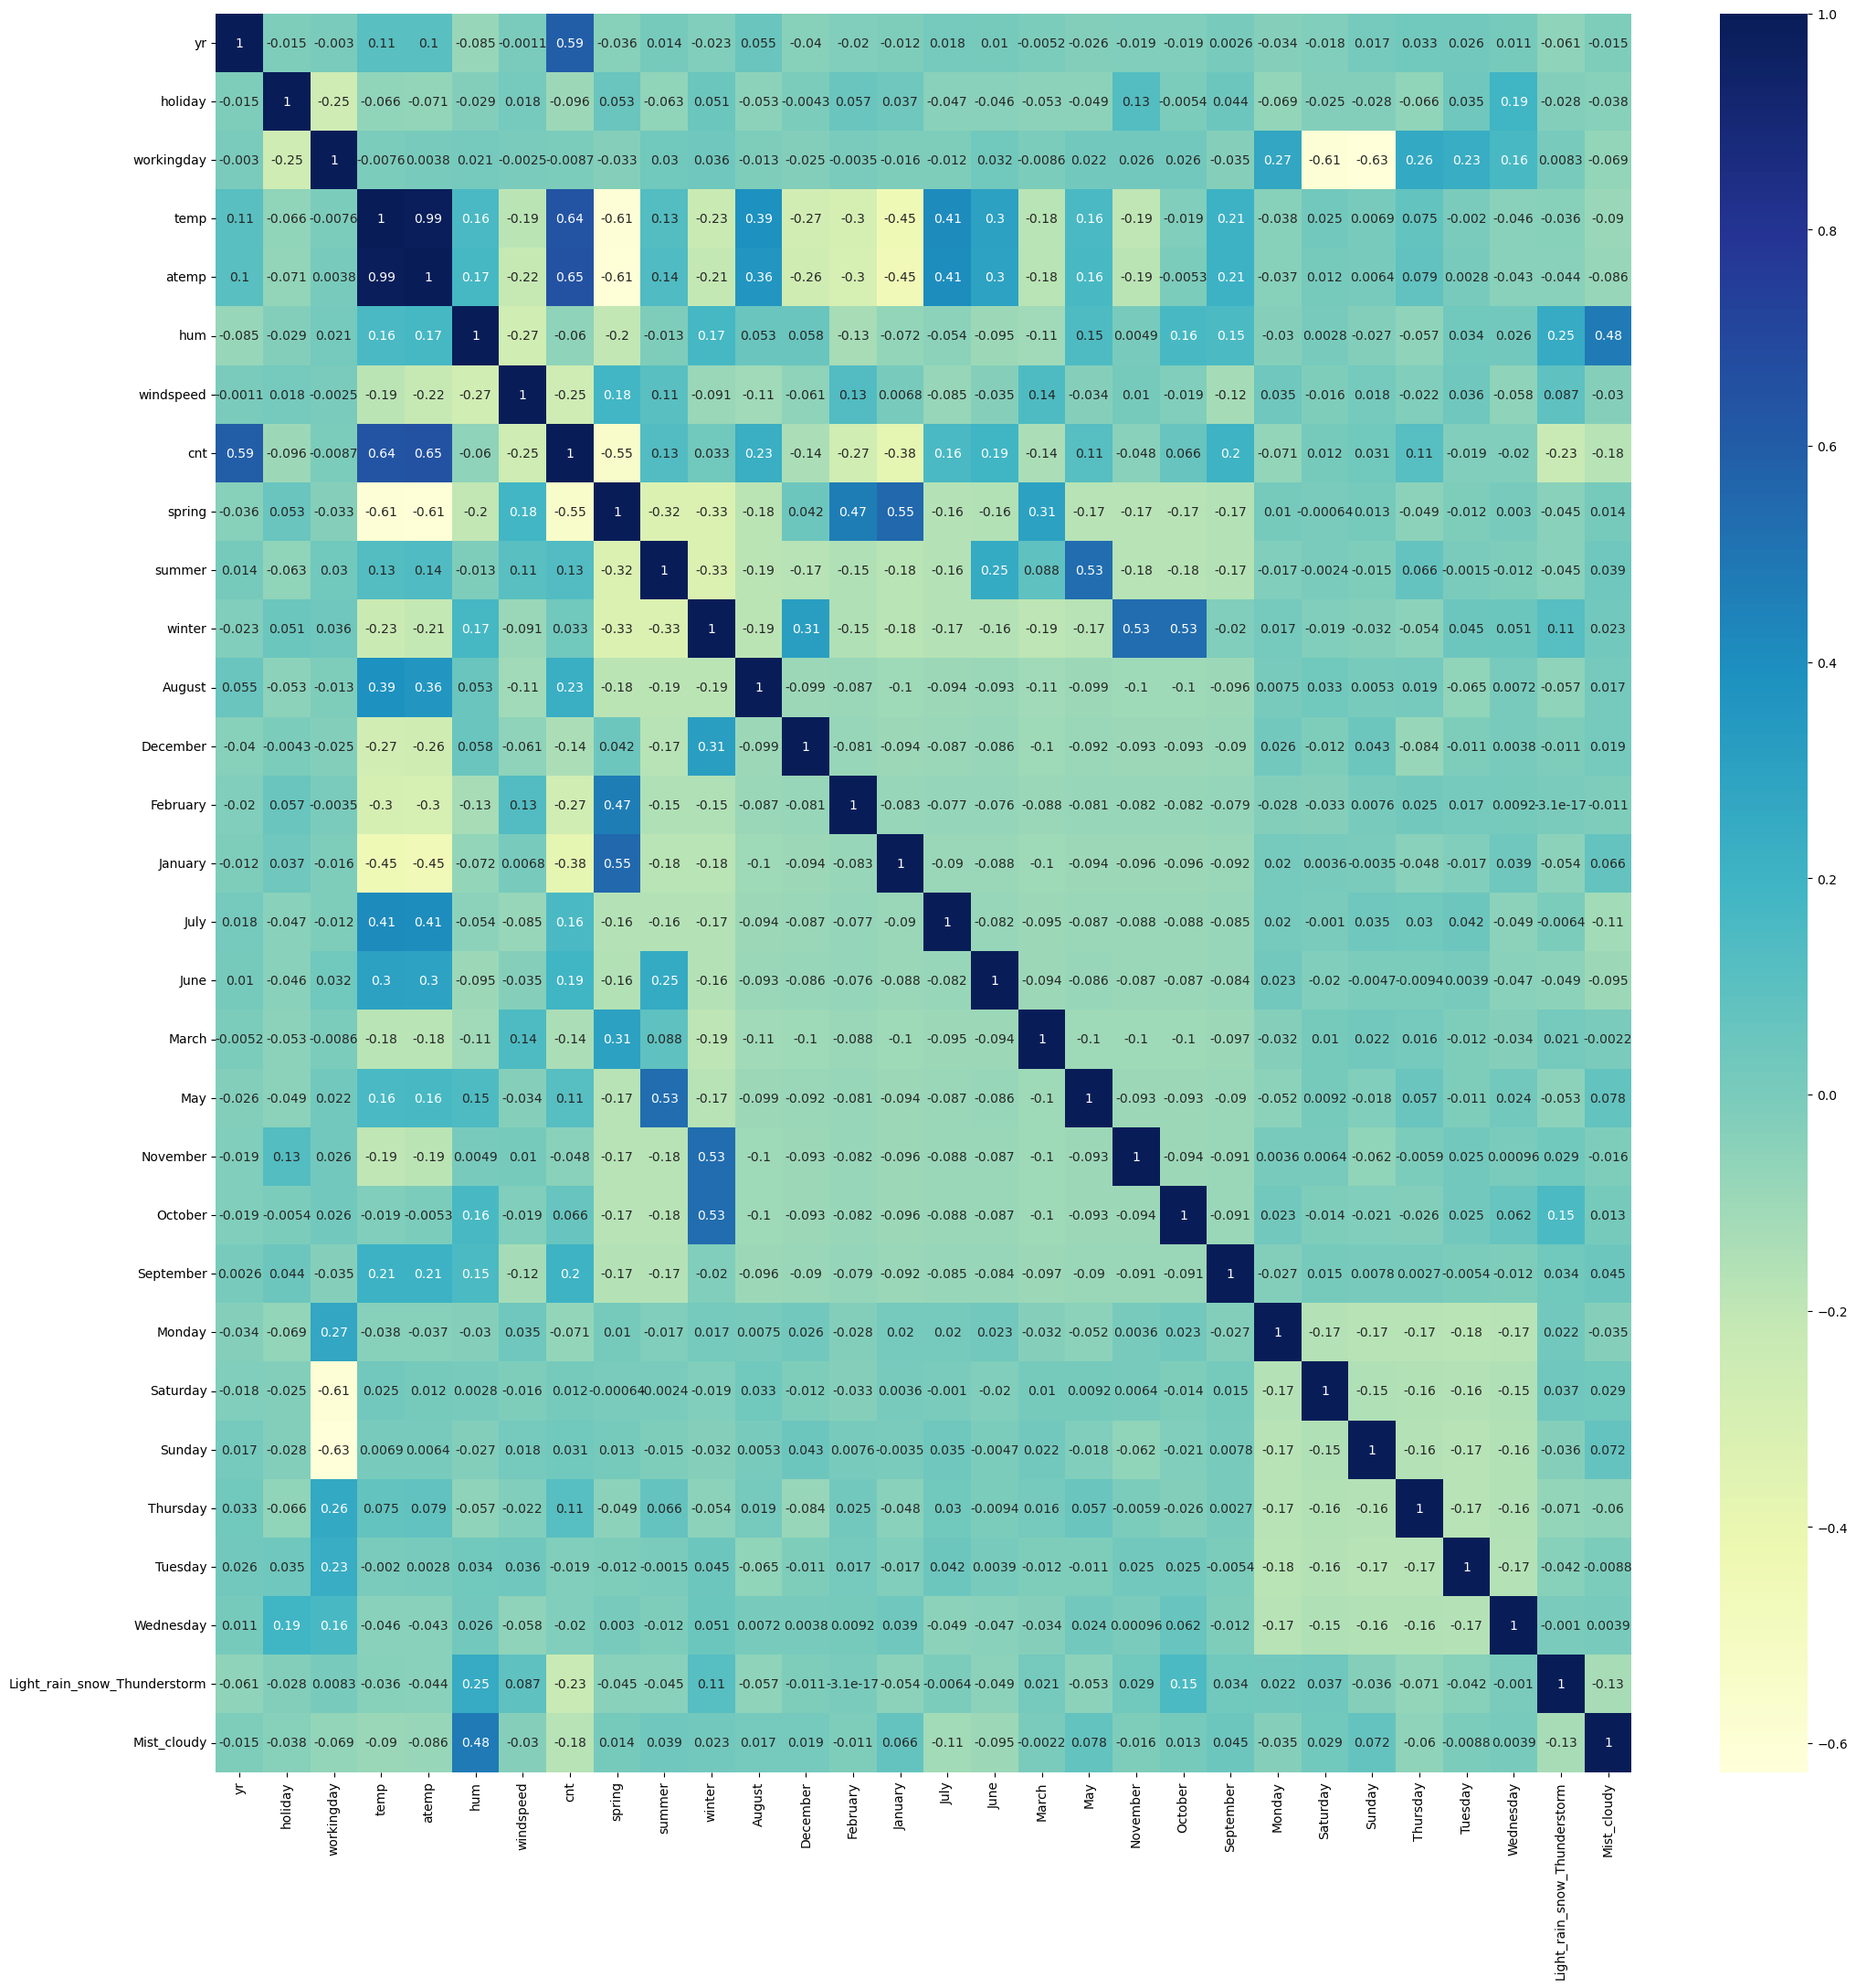

In [31]:
#Heatmap
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### We observe that:
1. Top correlations with cnt are yr, temp, atemp and spring
2. Variables temp and atemp are highly correlated with each other. To deal with this we will be calculating the VIF to decide which variable out of the two needs to be dropped.

In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [33]:
vif = pd.DataFrame()
X = df_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,452.22
4,atemp,382.58
2,workingday,68.27
5,hum,42.04
7,cnt,40.07
8,spring,13.56
24,Sunday,13.29
10,winter,13.03
23,Saturday,12.68
9,summer,10.08


In [34]:
#dropping variable with higher VIF, i.e. temp
df_train_new = df_train.drop(['temp'], axis=1)
df_train_new.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
# After dropping the variable with higher vif, the vifs of other variable should now be lesser than before. Let's check.
vif = pd.DataFrame()
X = df_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,67.96
3,atemp,46.60
4,hum,41.64
6,cnt,39.23
7,spring,13.53
23,Sunday,13.24
9,winter,12.93
22,Saturday,12.57
8,summer,9.99
18,November,7.15


### Step 4: Building Linear Model

In [36]:
# dividing into y train and x train
y_train = df_train_new.pop('cnt')
X_train = df_train_new

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', False, 10),
 ('June', False, 7),
 ('March', False, 14),
 ('May', False, 6),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Light_rain_snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'August', 'December', 'February', 'January', 'November', 'September',
       'Light_rain_snow_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

In [50]:
# checking the lenght 
len(col)

15

In [51]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'July', 'June', 'March', 'May', 'October',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [52]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [53]:
X_train_rfe = X_train[col]

In [54]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,winter,3.04
5,summer,2.28
14,Mist_cloudy,2.24
0,yr,2.06
10,January,1.92
11,November,1.85
8,December,1.63


In [ ]:
#Humidity has a high VIF

In [56]:
# Building 1st LR Model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          1.26e-186
Time:                        23:37:20   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2936      0.032      9.289      0.000       0.232       0.356
yr                               0.2311      0.008     28.328      0.000       0.215       0.247
holiday                         -0.0838      0.026     -3.233      0.001      -0.135      -0.033
atemp                            0.4765      0.032     14.938      0.000       0.414       0.539
hum                             -0.1627      0.038     -4.277      0.000      -0.237      -0.088
windspeed                       -0.1769      0.026     -6.784      0.000      -0.228      -0.126
summer                           0.0779      0.013      6.180      0.000       0.053       0.103
winter                           0.1358      0.014      9.541      0.000       0.108       0.164
August                           0.0606      0.016      3.696      0.000       0.028       0.093
December                        -0.0505      0.018     -2.732      0.007      -0.087      -0.014
February                        -0.0504      0.021     -2.384      0.017      -0.092      -0.009
January                         -0.0769      0.021     -3.617      0.000      -0.119      -0.035
November                        -0.0440      0.019     -2.316      0.021      -0.081      -0.007
September                        0.1116      0.017      6.688      0.000       0.079       0.144
Light_rain_snow_Thunderstorm    -0.2420      0.027     -9.070      0.000      -0.294      -0.190
Mist_cloudy                     -0.0569      0.011     -5.377      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       67.622   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.611
Skew:                          -0.675   Prob(JB):                     5.43e-38
Kurtosis:                       5.501   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.62
0,yr,2.06
4,summer,2.04
10,November,1.81
6,August,1.59
13,Mist_cloudy,1.57
7,December,1.41
11,September,1.35


In [59]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          7.00e-184
Time:                        23:37:53   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2114      0.026      8.281      0.000       0.161       0.262
yr                               0.2349      0.008     28.475      0.000       0.219       0.251
holiday                         -0.0851      0.026     -3.229      0.001      -0.137      -0.033
atemp                            0.4432      0.031     14.084      0.000       0.381       0.505
windspeed                       -0.1493      0.026     -5.808      0.000      -0.200      -0.099
summer                           0.0723      0.013      5.671      0.000       0.047       0.097
winter                           0.1244      0.014      8.746      0.000       0.096       0.152
August                           0.0580      0.017      3.479      0.001       0.025       0.091
December                        -0.0585      0.019     -3.132      0.002      -0.095      -0.022
February                        -0.0565      0.021     -2.636      0.009      -0.099      -0.014
January                         -0.0875      0.021     -4.070      0.000      -0.130      -0.045
November                        -0.0442      0.019     -2.287      0.023      -0.082      -0.006
September                        0.1044      0.017      6.180      0.000       0.071       0.138
Light_rain_snow_Thunderstorm    -0.2875      0.025    -11.540      0.000      -0.336      -0.239
Mist_cloudy                     -0.0828      0.009     -9.371      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       67.944   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.080
Skew:                          -0.682   Prob(JB):                     1.17e-37
Kurtosis:                       5.478   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_train_new = X_train_new.drop(['November'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.96
3,windspeed,3.75
0,yr,2.06
4,summer,2.04
5,winter,1.79
6,August,1.59
12,Mist_cloudy,1.57
10,September,1.33
9,January,1.28
8,February,1.26


In [ ]:
#VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [61]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          6.59e-184
Time:                        23:38:35   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     496   BIC:                            -905.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1967      0.025      7.928      0.000       0.148       0.245
yr                               0.2349      0.008     28.348      0.000       0.219       0.251
holiday                         -0.0925      0.026     -3.518      0.000      -0.144      -0.041
atemp                            0.4614      0.031     15.085      0.000       0.401       0.521
windspeed                       -0.1486      0.026     -5.756      0.000      -0.199      -0.098
summer                           0.0763      0.013      6.014      0.000       0.051       0.101
winter                           0.1109      0.013      8.533      0.000       0.085       0.136
August                           0.0587      0.017      3.509      0.000       0.026       0.092
December                        -0.0408      0.017     -2.389      0.017      -0.074      -0.007
February                        -0.0470      0.021     -2.225      0.027      -0.088      -0.005
January                         -0.0767      0.021     -3.642      0.000      -0.118      -0.035
September                        0.1097      0.017      6.535      0.000       0.077       0.143
Light_rain_snow_Thunderstorm    -0.2831      0.025    -11.351      0.000      -0.332      -0.234
Mist_cloudy                     -0.0821      0.009     -9.262      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       60.908   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.579
Skew:                          -0.629   Prob(JB):                     2.44e-32
Kurtosis:                       5.295   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# We can drop December variable as it has high p-value
X_train_new = X_train_new.drop(['December'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.96
3,windspeed,3.70
0,yr,2.05
4,summer,2.03
5,winter,1.66
6,August,1.59
11,Mist_cloudy,1.56
9,September,1.32
8,January,1.27
7,February,1.25


In [64]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          7.58e-184
Time:                        23:39:40   Log-Likelihood:                 493.70
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     497   BIC:                            -906.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1734      0.023      7.566      0.000       0.128       0.218
yr                               0.2348      0.008     28.208      0.000       0.218       0.251
holiday                         -0.0910      0.026     -3.447      0.001      -0.143      -0.039
atemp                            0.4867      0.029     16.884      0.000       0.430       0.543
windspeed                       -0.1412      0.026     -5.485      0.000      -0.192      -0.091
summer                           0.0828      0.012      6.644      0.000       0.058       0.107
winter                           0.1109      0.013      8.490      0.000       0.085       0.137
August                           0.0612      0.017      3.651      0.000       0.028       0.094
February                        -0.0337      0.020     -1.648      0.100      -0.074       0.006
January                         -0.0610      0.020     -3.034      0.003      -0.100      -0.021
September                        0.1143      0.017      6.820      0.000       0.081       0.147
Light_rain_snow_Thunderstorm    -0.2794      0.025    -11.172      0.000      -0.329      -0.230
Mist_cloudy                     -0.0822      0.009     -9.233      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       55.801   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.018
Skew:                          -0.584   Prob(JB):                     3.55e-29
Kurtosis:                       5.192   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['January'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.92
3,windspeed,3.35
0,yr,2.01
4,summer,1.91
5,winter,1.57
6,August,1.56
10,Mist_cloudy,1.49
8,September,1.31
7,February,1.20
9,Light_rain_snow_Thunderstorm,1.08


In [66]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          4.68e-183
Time:                        23:40:02   Log-Likelihood:                 489.02
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     498   BIC:                            -903.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1299      0.018      7.209      0.000       0.094       0.165
yr                               0.2334      0.008     27.854      0.000       0.217       0.250
holiday                         -0.0936      0.027     -3.517      0.000      -0.146      -0.041
atemp                            0.5350      0.024     22.086      0.000       0.487       0.583
windspeed                       -0.1315      0.026     -5.104      0.000      -0.182      -0.081
summer                           0.0969      0.012      8.314      0.000       0.074       0.120
winter                           0.1312      0.011     11.621      0.000       0.109       0.153
August                           0.0675      0.017      4.020      0.000       0.034       0.100
February                        -0.0063      0.019     -0.338      0.735      -0.043       0.030
September                        0.1203      0.017      7.170      0.000       0.087       0.153
Light_rain_snow_Thunderstorm    -0.2769      0.025    -10.988      0.000      -0.326      -0.227
Mist_cloudy                     -0.0836      0.009     -9.324      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       52.173   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.440
Skew:                          -0.536   Prob(JB):                     3.50e-28
Kurtosis:                       5.191   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# We can drop February variable as it has high p-value
X_train_new = X_train_new.drop(['February'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.91
3,windspeed,3.05
0,yr,2.00
4,summer,1.82
6,August,1.55
5,winter,1.50
9,Mist_cloudy,1.49
7,September,1.30
8,Light_rain_snow_Thunderstorm,1.08
1,holiday,1.04


In [69]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          3.10e-184
Time:                        23:41:01   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1280      0.017      7.462      0.000       0.094       0.162
yr                               0.2334      0.008     27.876      0.000       0.217       0.250
holiday                         -0.0939      0.027     -3.535      0.000      -0.146      -0.042
atemp                            0.5370      0.023     22.862      0.000       0.491       0.583
windspeed                       -0.1320      0.026     -5.136      0.000      -0.182      -0.081
summer                           0.0978      0.011      8.634      0.000       0.076       0.120
winter                           0.1324      0.011     12.266      0.000       0.111       0.154
August                           0.0680      0.017      4.069      0.000       0.035       0.101
September                        0.1207      0.017      7.224      0.000       0.088       0.154
Light_rain_snow_Thunderstorm    -0.2770      0.025    -11.000      0.000      -0.326      -0.228
Mist_cloudy                     -0.0836      0.009     -9.330      0.000      -0.101      -0.066
==============================================================================
Omnibus:                       51.599   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.201
Skew:                          -0.530   Prob(JB):                     6.50e-28
Kurtosis:                       5.184   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 242.4 (which is greater than 1) and the p-value of 3.10e-184 i.e almost equals to zero, states that the overall model is significant

In [70]:
# Checking the parameters and their coefficient values
lr_6.params

const                           0.128027
yr                              0.233374
holiday                        -0.093901
atemp                           0.536969
windspeed                      -0.131954
summer                          0.097789
winter                          0.132357
August                          0.067977
September                       0.120748
Light_rain_snow_Thunderstorm   -0.276982
Mist_cloudy                    -0.083591
dtype: float64

#### ## Step 5: Residual Analysis of the train data and validation

In [71]:
X_train_lm_6

,const,yr,holiday,atemp,windspeed,summer,winter,August,September,Light_rain_snow_Thunderstorm,Mist_cloudy
653,1.0,1,0,0.501133,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,0,0,0,0,0,1
728,1.0,1,0,0.200348,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.188475,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.762183,0.355596,1,0,0,0,0,1
578,1.0,1,0,0.824359,0.187140,0,0,1,0,0,0
53,1.0,0,0,0.218747,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.431816,0,1,0,0,0,1


In [72]:
y_train_pred = lr_6.predict(X_train_lm_6)

In [76]:
#Normality of error terms
#Plotting histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

In [ ]:
#Error terms show normal distribution

In [77]:
#Checking multicolinearity
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.91
3,windspeed,3.05
0,yr,2.00
4,summer,1.82
6,August,1.55
5,winter,1.50
9,Mist_cloudy,1.49
7,September,1.30
8,Light_rain_snow_Thunderstorm,1.08
1,holiday,1.04


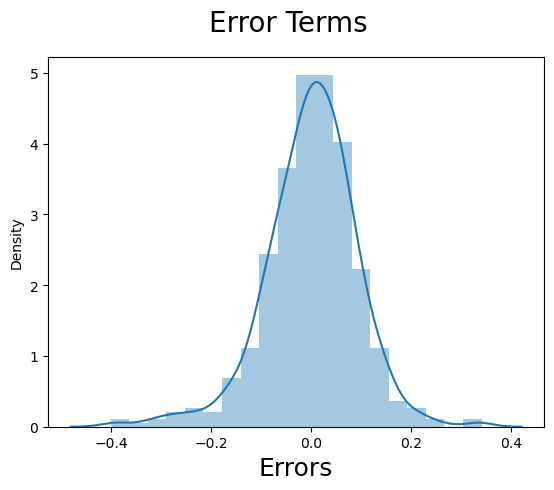

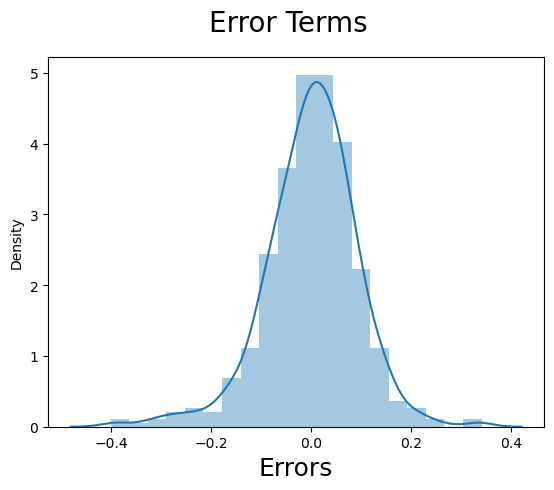

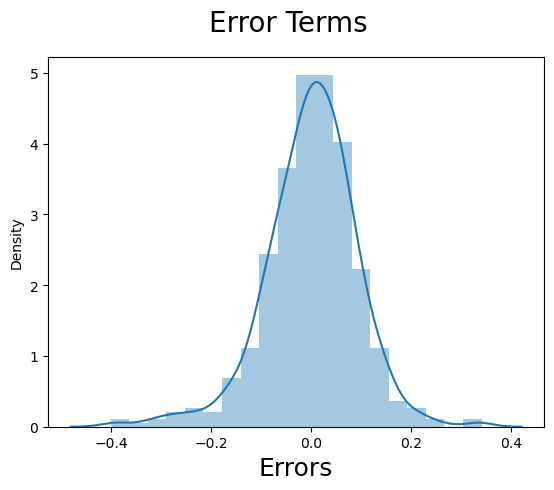

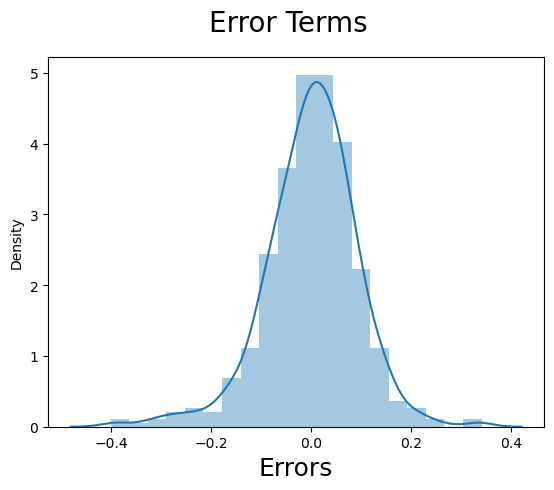

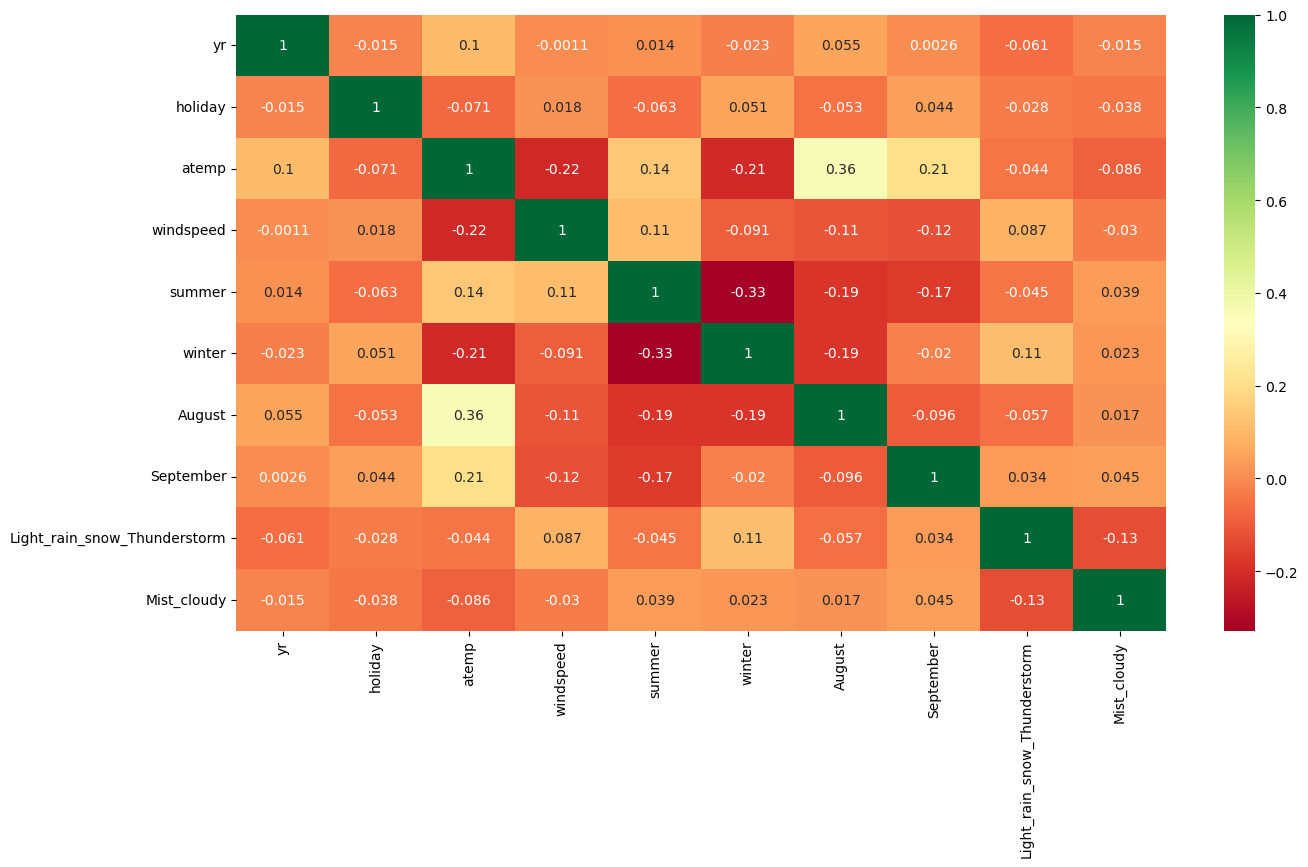

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### All VIF values are less than 5 which is good and shows that there is no multicollinearity 

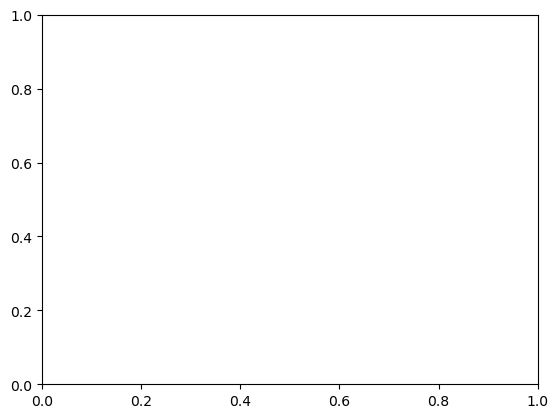

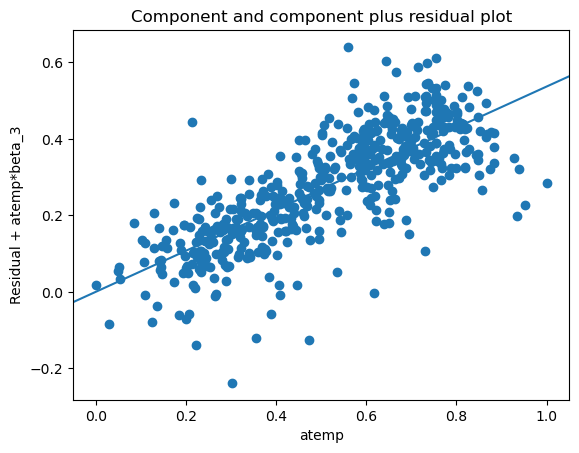

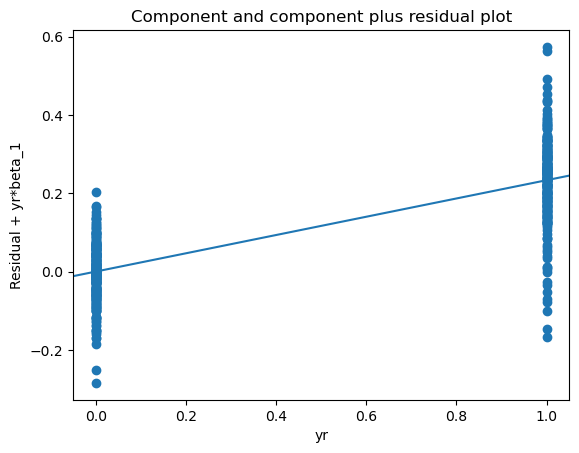

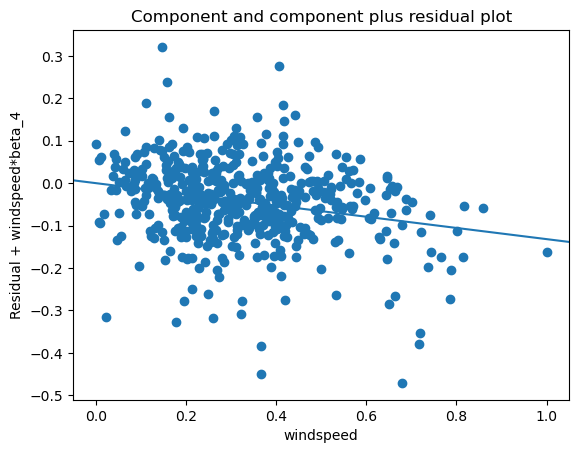

In [81]:
#Linearity
sm.graphics.plot_ccpr(lr_6, 'atemp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

In [ ]:
#Linearoty can be observed from the given plots above

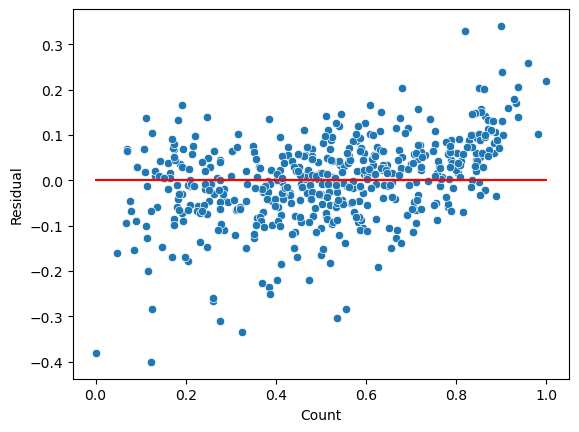

In [82]:
#Homoscedasticity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [83]:
#There is no visible pattern above

In [84]:
#Independence of residuals
#Durbin-Watson value of final model lr_6 is 2.038, which signifies there is no autocorrelation.

#### Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [88]:
# Applying scaling on the test dataset

num_vars = ['temp','atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
184,0,1,0,0.000897,0.769660,1.865042,0.056255,193.808492,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.001160,0.842587,1.725746,0.078579,199.199044,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,-0.000314,0.496145,2.396893,0.136540,85.227374,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.001085,0.795343,1.215425,0.138263,153.283093,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.000842,0.741471,0.853260,0.201802,159.315377,0,1,...,0,0,0,1,0,0,0,0,0,0


In [89]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,-0.000136,0.532991,1.809432,0.129842,145.806324,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.000885,0.217888,0.439359,0.051368,60.920734,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,-0.002076,0.025950,0.698771,0.015460,14.059253,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.000910,0.344751,1.481350,0.092963,105.907200,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.000137,0.549198,1.777667,0.125381,146.833682,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000621,0.714132,2.120341,0.158650,188.241464,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.001474,0.980934,2.881888,0.288534,269.276220,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [92]:
y_pred = lr_6.predict(X_test_lm_6)

In [93]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

-5.7061

#### Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

Text(0, 0.5, 'y_pred')

In [95]:
round(lr_6.params,4)

const                           0.1280
yr                              0.2334
holiday                        -0.0939
atemp                           0.5370
windspeed                      -0.1320
summer                          0.0978
winter                          0.1324
August                          0.0680
September                       0.1207
Light_rain_snow_Thunderstorm   -0.2770
Mist_cloudy                    -0.0836
dtype: float64

#### We can see that the equation of our best fitted line is:

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [96]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

-6.0285


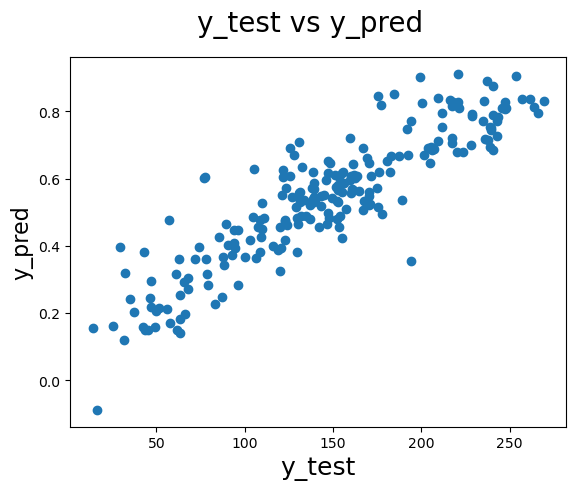

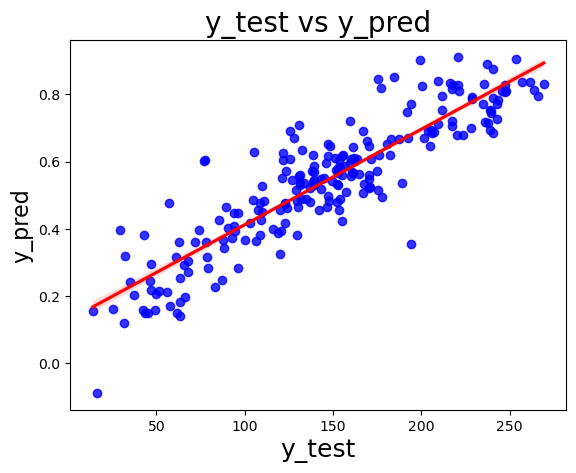

In [97]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, atemp, windspeed, summer, winter, August, September, Light_rain_snow_Thunderstorm, Mist_cloudy.